# Exploring simplices and cubes

Diagrammatic sets — the structure implemented by `rewalt`'s `DiagSet` class — support a wide variety of "shapes of diagrams", while remaining "topologically sound". This makes them a convenient tool for diagrammatic reasoning in higher category, higher algebra, and homotopy theory.

Among these shapes are some subclasses that are widely used on their own: in particular, the *simplices* and the *cubes*. Indeed, both [simplicial sets](https://ncatlab.org/nlab/show/simplicial+set) and [cubical sets with connections](https://ncatlab.org/nlab/show/connection+on+a+cubical+set) are special instances of diagrammatic sets (their categories are full subcategories of the category of diagrammatic sets).

Reflecting this, `rewalt` contains a full implementation of (finitely presented) simplicial sets and of (finitely presented) cubical sets with connections. These are nothing more than diagrammatic sets whose generators all have simplicial and cubical shapes! The `Diagram` objects that have simplicial or cubical shapes come with special methods for constructing simplicial and cubical faces, degeneracies, and connections.

Since all our shapes have a "globular" orientation (half a boundary is "input", half a boundary is "output"), our simplices are in fact Street's [oriented simplices](https://ncatlab.org/nlab/show/oriental). Similarly our cubes are "oriented" as in [cubical ω-categories](https://arxiv.org/abs/math/0007009).

Understanding higher-dimensional oriented simplices and cubes can be difficult. In this notebook, we will try to use `rewalt` and its visualisation methods to get a grip on some low-but-not-too-low-dimensional examples.

## Oriented simplices

Oriented simplices of any dimension are built with the `Shapes.simplex` constructor. Let's start with the lowest possible dimension: -1.

In [1]:
import rewalt

# the next lines are only to avoid a jupyter warning; you can ignore them
rewalt.strdiags.DEFAULT['show'] = False
rewalt.hasse.DEFAULT['show'] = False

empty = rewalt.Shape.simplex(-1)

This is just the empty diagram shape.

In [2]:
len(empty)

0

The 0-dimensional simplex is a point.

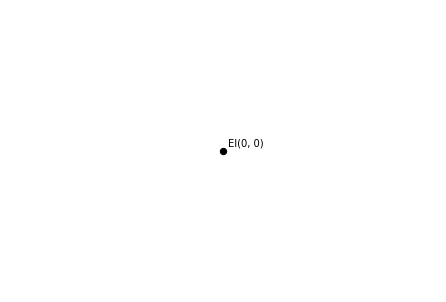

In [3]:
point = rewalt.Shape.simplex(0)
point.draw()

The 1-dimensional oriented simplex is an arrow.

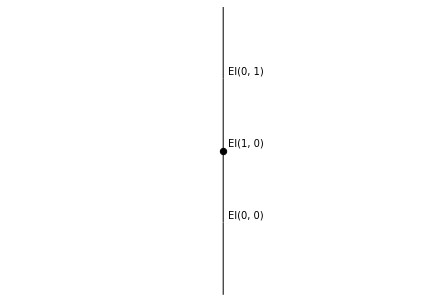

In [4]:
arrow = rewalt.Shape.simplex(1)
arrow.draw()

Things get a little more interesting in dimension 2. The oriented 2-simplex is a triangle with two output sides and one input side. In string diagrams, it is, for example, the shape of a *comonoid comultiplication*.

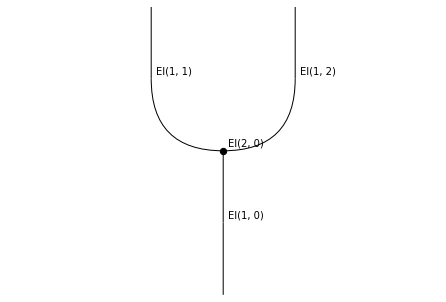

In [5]:
triangle = rewalt.Shape.simplex(2)
triangle.draw()

Let's go one dimension higher. The oriented 3-simplex is a tetrahedron with two output faces and two input faces, each of them shaped as an oriented 2-simplex.

Let's draw both its top-dimensional "slice" string diagram, and its input and output boundaries.

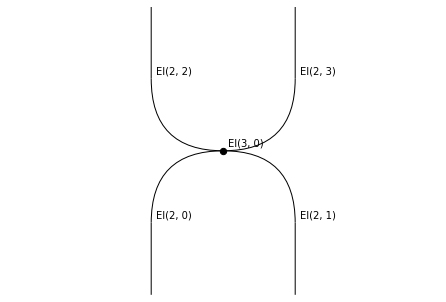

In [6]:
tetrahedron = rewalt.Shape.simplex(3)
tetrahedron.draw()

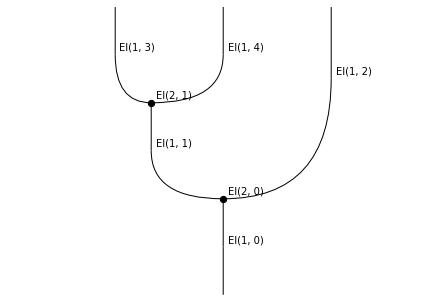

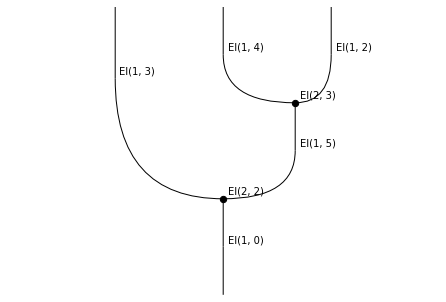

In [7]:
tetrahedron.draw_boundaries()

If we stick to the interpretation of the oriented 2-simplex as "the shape of a comultiplication", then the oriented 3-simplex is "the shape of a (co)associativity equation", or "the shape of a coassociator"!

What happens if we go to dimension 4?

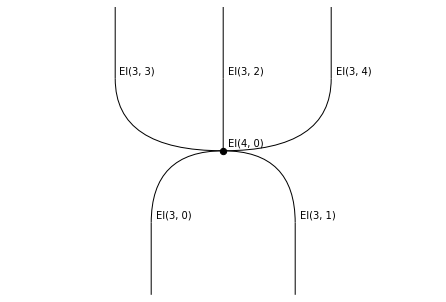

In [8]:
pentachoron = rewalt.Shape.simplex(4)
pentachoron.draw()

This is a *pentachoron*, also known as the [5-cell](https://en.wikipedia.org/wiki/5-cell), with three output tetrahedral faces and two input tetrahedral faces.

Let's see what its boundaries look like, starting from the input.

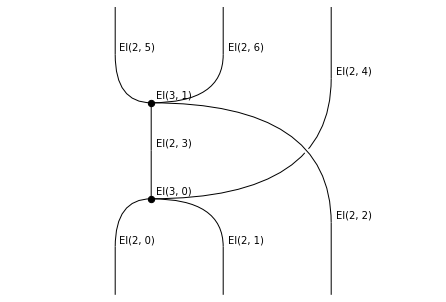

In [9]:
penta_input = pentachoron.input
penta_input.draw()

This is a slice of a 3-dimensional diagram with two 3-dimensional cells. 

This is still hard to visualise directly in three dimensions; instead, we are going to try to visualise it as a *sequence of rewrites on 2-dimensional diagrams*.

For that purpose, we use the `generate_layering` method, which creates a "layering" of a diagram into a sequence of rewrites, one for each one of its top-dimensional cells. Then, we can

- get a list of the layers with the `layers` attribute, or
- get a list of the corresponding "rewrite steps" with the `rewrite_steps` attribute.

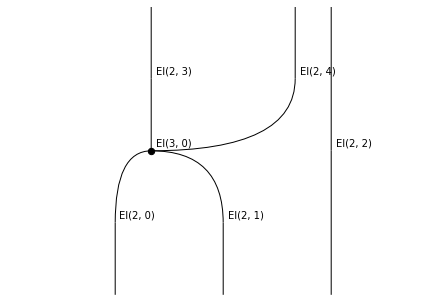

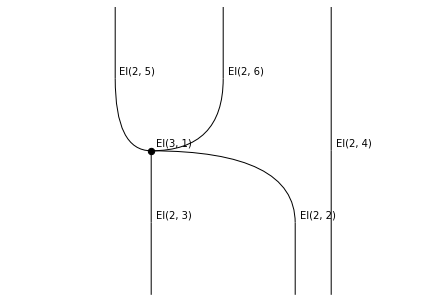

In [10]:
penta_input.generate_layering()
rewalt.strdiags.draw(*penta_input.layers)

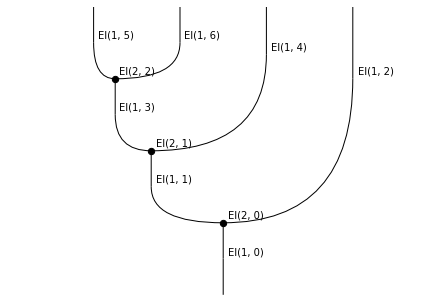

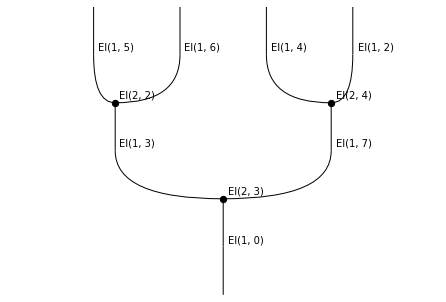

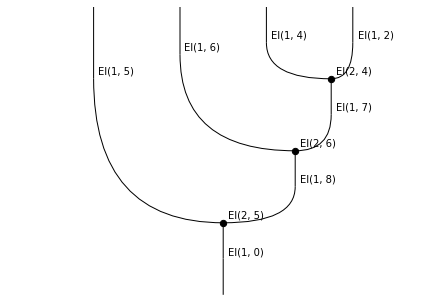

In [11]:
rewalt.strdiags.draw(*penta_input.rewrite_steps)

So, we can see that

- first the 3-dimensional face `El(3, 0)` "rewrites" the triangles `El(2, 0)` and `El(2, 1)` into the triangles `El(2, 3)` and `El(2, 4)`,
- then the 3-dimensional face `El(3, 1)` "rewrites" the triangles `El(2, 2)` and `El(2, 3)` into the triangles `El(2, 5)` and `El(2, 6)`.

We can also create a gif "movie" of the rewrite steps (and make it loop backwards so it doesn't stop too soon).

In [12]:
rewalt.strdiags.to_gif(
    *penta_input.rewrite_steps,
    loop=True, path='simplicescubes_1.gif')

![PentaInput](simplicescubes_1.gif 'The input of the oriented 4-simplex, as a rewrite sequence.')

Now, let's look at the output boundary of the oriented 4-simplex.

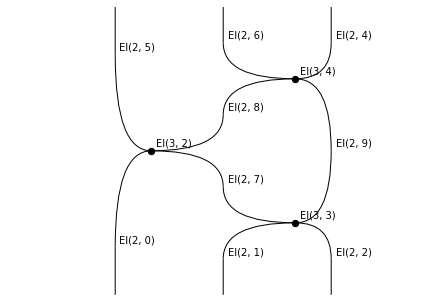

In [13]:
penta_output = pentachoron.output
penta_output.draw()

This is the slice of a 3-dimensional diagram with three 3-dimensional cells. Let's proceed as with the input.

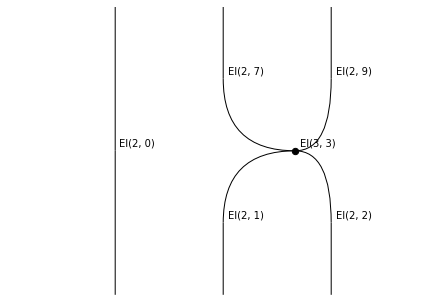

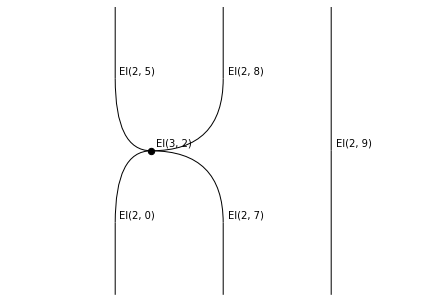

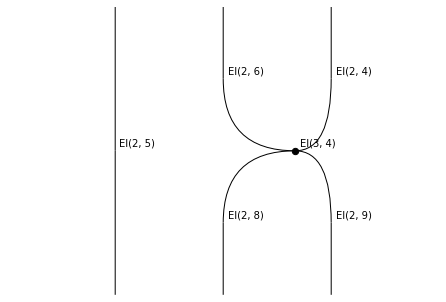

In [14]:
penta_output.generate_layering()
rewalt.strdiags.draw(*penta_output.layers)

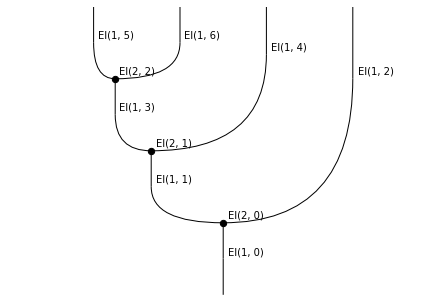

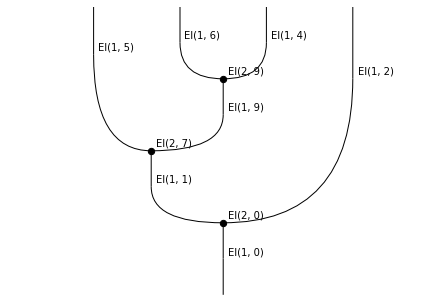

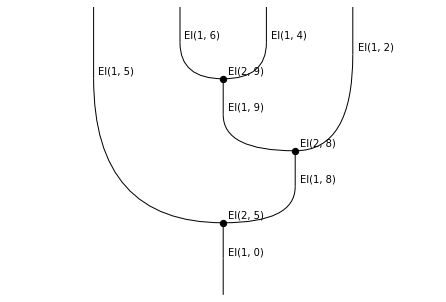

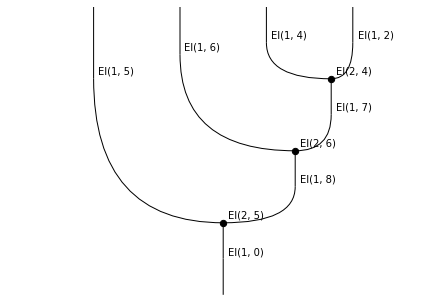

In [15]:
rewalt.strdiags.draw(*penta_output.rewrite_steps)

Let's also make a movie of these.

In [16]:
rewalt.strdiags.to_gif(
    *penta_output.rewrite_steps, loop=True,
    path='simplicescubes_2.gif')

![PentaOutput](simplicescubes_2.gif 'The output of the oriented 4-simplex, as a rewrite sequence.')

The two sides of the oriented 4-simplex are, in fact, the two sides of an equation dual to *Mac Lane's pentagon*. This was featured at the end of [this other notebook](monoids.html).

## Maps of simplices

So far we have only looked at the oriented simplices "in isolation". Let's see how we can use `rewalt` to understand their face and degeneracy maps.

Faces are quite simple; let's look at the example of the 2-simplex. This has 3 faces.

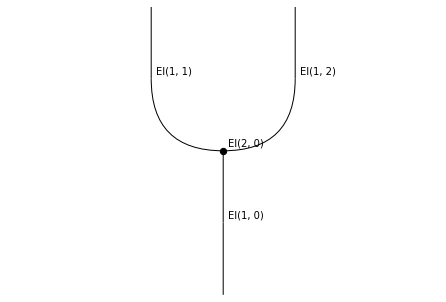

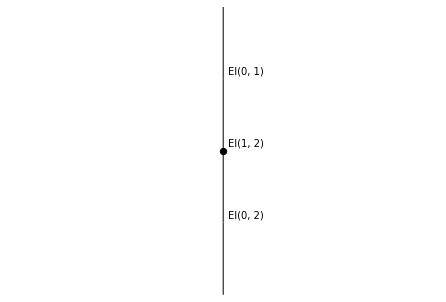

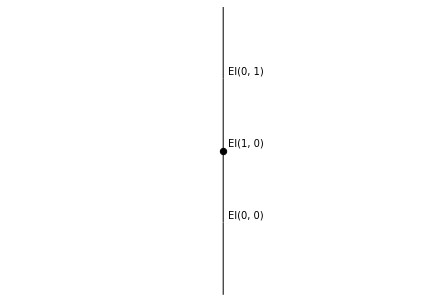

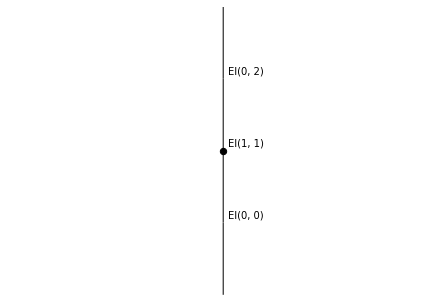

In [17]:
triangle.draw()
for n in range(3):
    triangle.simplex_face(n).draw()

By comparing labels, we can see that

- the 0th face of the 2-simplex is the *rightmost* output,
- the 1st face of the 2-simplex is the only input, and
- the 2nd face of the 2-simplex is the *leftmost* output.

In general, the faces of an oriented simplex alternate between inputs and outputs, always starting with an output at index 0.

Let's look at degeneracies; these are somewhat more interesting. There are two degeneracies on the 1-simplex.

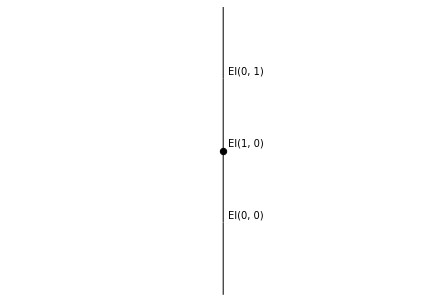

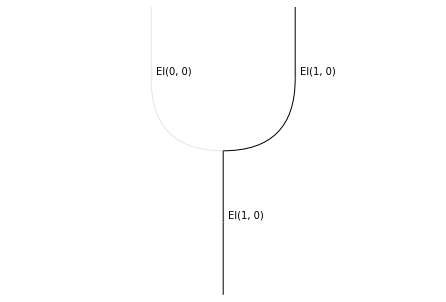

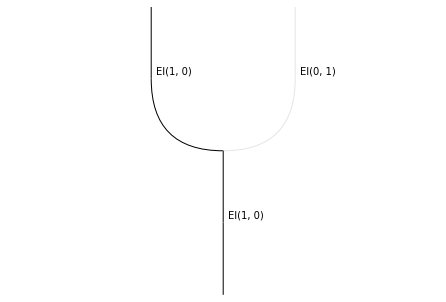

In [18]:
arrow.draw()
for n in range(2):
    arrow.simplex_degeneracy(n).draw()

The two diagrams represent two surjective ("collapsing") maps from the 2-simplex to the 1-simplex. The string diagrams tell us that

- the 0th degeneracy sends the 2-cell, its input, and the *rightmost* output of the 2-simplex onto the 1-cell of the 1-simplex, and collapses the *leftmost* output onto its input 0-cell;
- the 1st degeneracy sends the 2-cell, its input, and the *leftmost* output of the 2-simplex onto the 1-cell of the 1-simplex, and collapses the *rightmost* output onto its output 0-cell.

Now, let's take a look at one degeneracy of the 2-simplex.

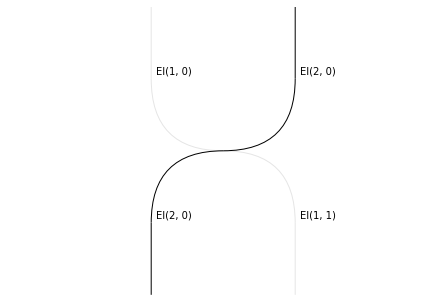

In [19]:
triangle.simplex_degeneracy(0).draw()

This represents a collapsing map from the 3-simplex onto the 2-simplex; the string diagram tells us which input and which output of the 3-simplex are collapsed, and which are sent to the 2-cell of the 2-simplex.

Let's obtain some more information by looking at the boundaries.

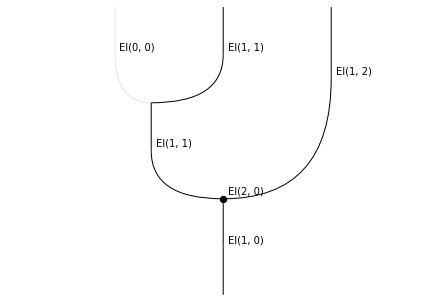

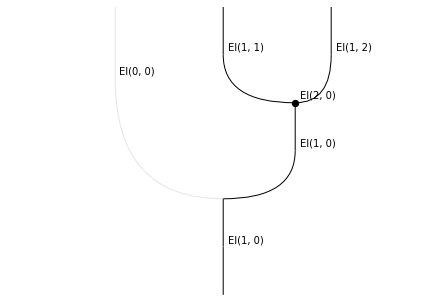

In [20]:
triangle.simplex_degeneracy(0).draw_boundaries()

This tells us exactly how the two collapsed 2-dimensional faces of the 3-simplex are collapsed: we can tell that, in both cases, it is the leftmost output that is collapsed, hence the *0-th* degeneracy of the 1-simplex is used.

By the way, if we want a precise (but not very intuitive) description of a map, we can use the Hasse diagram visualisation:

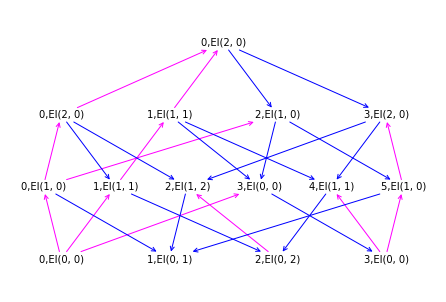

In [21]:
triangle.simplex_degeneracy(0).hasse()

This shows us the "oriented face poset" of the source of the map — here, the 3-simplex — with each element labelled with its image through the map. For example, the third element of the third row from the bottom is labelled with `El(1, 0)`; this means that the map sends `El(2, 2)` to `El(1, 0)` (we are counting from 0).

## Constructing a simplicial set

Let's briefly look at how we can use `rewalt` to construct a simplicial set. As a simple example, we will construct the 3-dimensional *real projective space* $\mathbb{R}P^3$, with its cell structure made up of a single cell in each dimension.

The first step is to create an empty diagrammatic set.

In [22]:
RP3 = rewalt.DiagSet()

To ensure that this is really a simplicial set, we only add generators with the `add_simplex` method, taking, as arguments, the simplicial faces of the new generator in the same order as given by `simplex_face`.

(In dimension 0 and 1, there's no substantial difference between `add` and `add_simplex`).

In [23]:
c0 = RP3.add_simplex('c0')
c1 = RP3.add_simplex('c1', c0, c0)

We construct degenerate simplices over the generators with the `simplex_degeneracy` method.

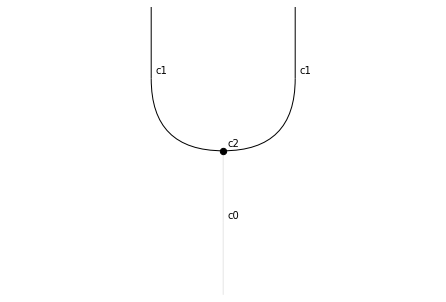

In [24]:
c2 = RP3.add_simplex('c2', c1, c0.simplex_degeneracy(0), c1)
c2.draw()

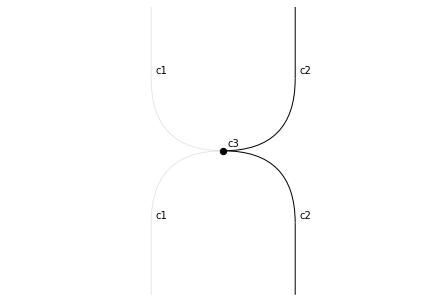

In [25]:
c3 = RP3.add_simplex(
    'c3',
    c2, c1.simplex_degeneracy(0), c1.simplex_degeneracy(1), c2)
c3.draw()

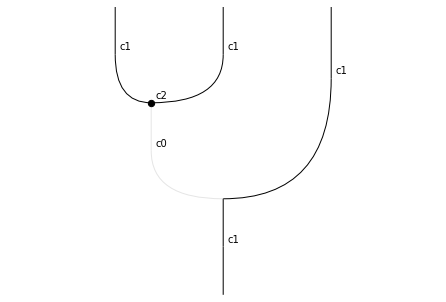

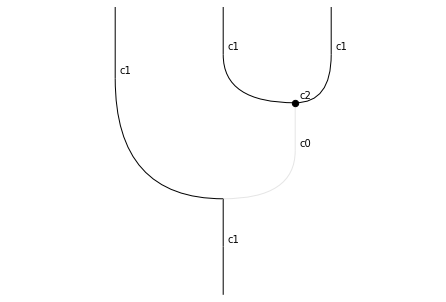

In [26]:
c3.draw_boundaries()

There we go; `RP3` is now a simplicial model of the 3-dimensional real projective space. We can check that this is "really" a simplicial set:

In [27]:
RP3.issimplicial

True

In future releases, we plan to add features that will allow us to automatically compute some topological invariants of cell complexes constructed as `DiagSet` objects.

## Oriented cubes

Let's move on from simplices to cubes; these can be obtained with the `Shape.cube` constructor. Unlike in simplices, there is no (-1)-cube. The 0-cube and the 1-cube are, in fact, the same as the 0-simplex and the 1-simplex.

In [28]:
assert point == rewalt.Shape.cube(0)
assert arrow == rewalt.Shape.cube(1)

So the first interesting case is the oriented 2-cube: this is a square with two output faces and two input faces.

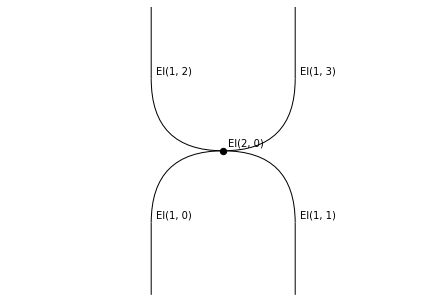

In [29]:
square = rewalt.Shape.cube(2)
square.draw()

Next, the oriented 3-cube has three output faces and three input faces. (In fact, the oriented n-cube always has n inputs and n outputs.)

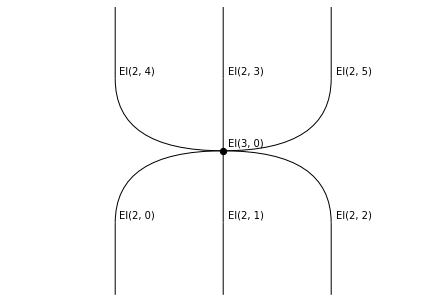

In [30]:
cube = rewalt.Shape.cube(3)
cube.draw()

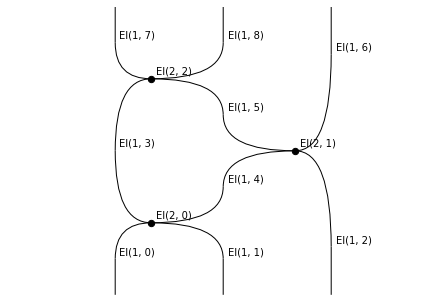

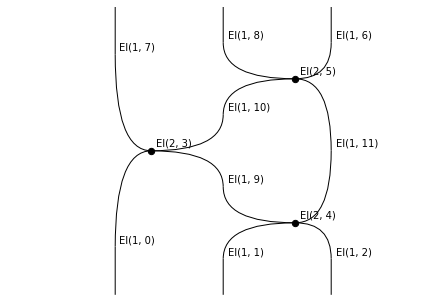

In [31]:
cube.draw_boundaries()

You may see the 2-dimensional boundaries of the oriented 3-cube, in string diagrams, as the shapes of the two sides of the [Yang-Baxter equation](https://en.wikipedia.org/wiki/Yang%E2%80%93Baxter_equation), or the two sides of the third [Reidemeister move](https://ncatlab.org/nlab/show/Reidemeister+move).

Let's move on to the 4-dimensional cube.

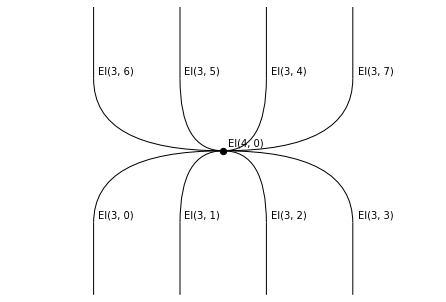

In [32]:
tesseract = rewalt.Shape.cube(4)
tesseract.draw()

As expected, it has four input faces and four output faces. Let's proceed as we did with the 4-simplex to understand what is happening.

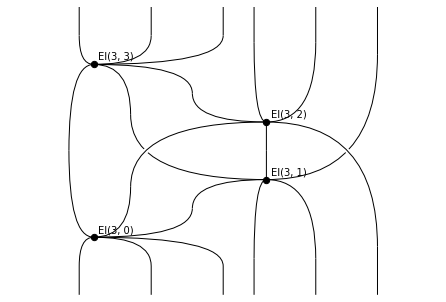

In [33]:
tess_input = tesseract.input
tess_input.draw(wirelabels=False)

(We have deactivated wire labels to make the image less crowded.)

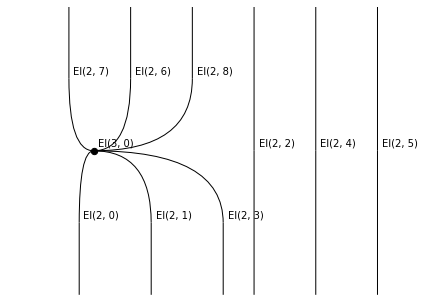

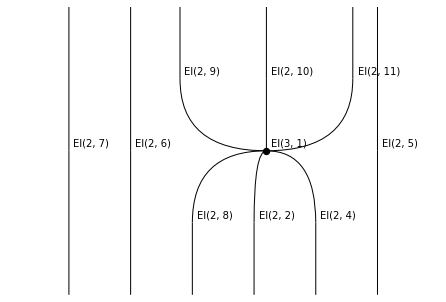

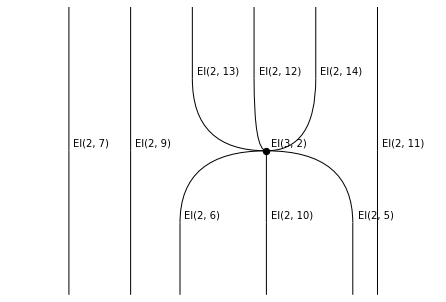

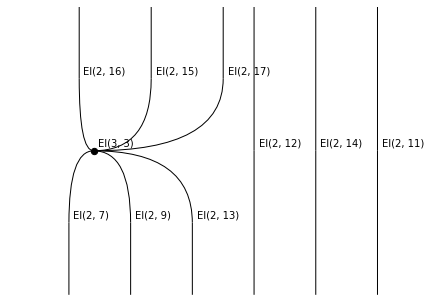

In [34]:
tess_input.generate_layering()
rewalt.strdiags.draw(*tess_input.layers)

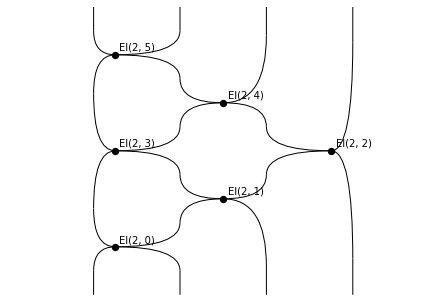

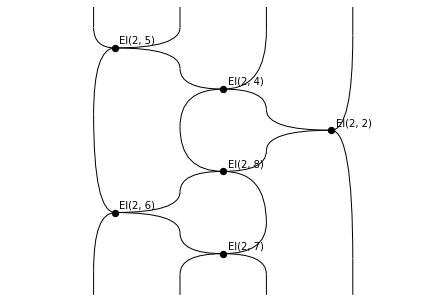

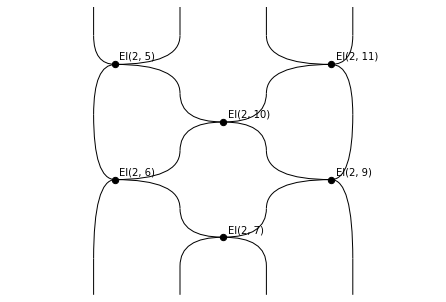

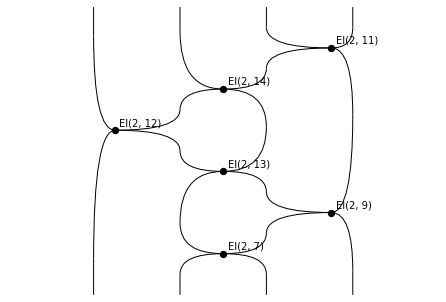

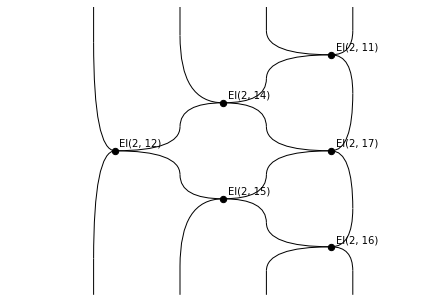

In [35]:
rewalt.strdiags.draw(*tess_input.rewrite_steps, wirelabels=False)

Now we turn the sequence of rewrite steps into a gif.

In [36]:
rewalt.strdiags.to_gif(
    *tess_input.rewrite_steps, loop=True,
    wirelabels=False,
    path='simplicescubes_3.gif')

![TessInput](simplicescubes_3.gif 'The input of the oriented 4-cube, as a rewrite sequence.')

Next we focus on the output of the 4-cube.

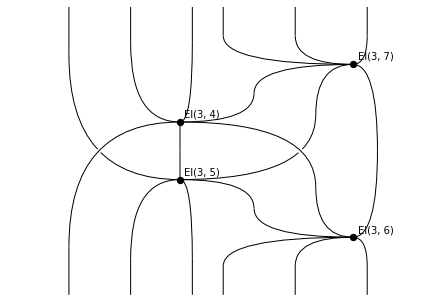

In [37]:
tess_output = tesseract.output
tess_output.draw(wirelabels=False)

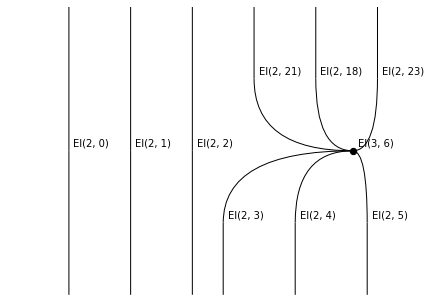

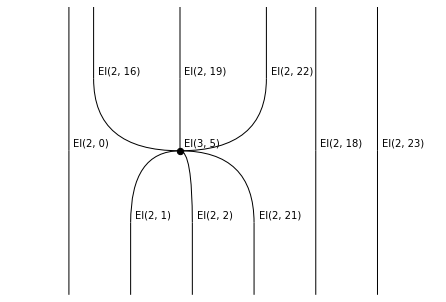

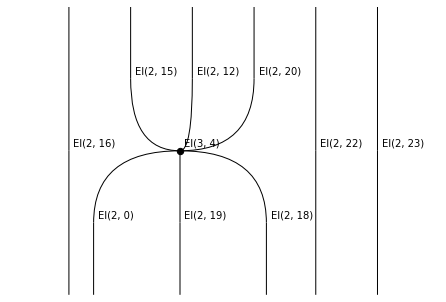

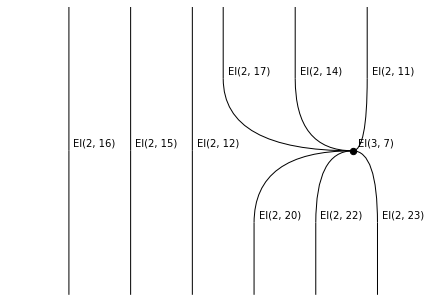

In [38]:
tess_output.generate_layering()
rewalt.strdiags.draw(*tess_output.layers)

In [39]:
rewalt.strdiags.to_gif(
    *tess_output.rewrite_steps, loop=True,
    wirelabels=False,
    path='simplicescubes_4.gif')

![TessOutput](simplicescubes_4.gif 'The output of the oriented 4-cube, as a rewrite sequence.')

In the two rewrite sequences corresponding to the input and output boundary of the 4-cube, you may recognise the shapes of the two sides of the [Zamolodchikov tetrahedron equation](https://arxiv.org/abs/math/0307263).

(Why "tetrahedron equation" if its shape is a 4-cube? Not sure!)

## Maps of cubes

In contrast to simplices, faces of cubes are specified by two arguments: thinking of the n-cube as $[0, 1]^n$, one argument is an integer ranging from 0 to (n-1), specifying which coordinate to fix, and the other is a bit (for us, a *sign*: `'-'` or `'+'`) specifying whether to set the coordinate to 0 or to 1.

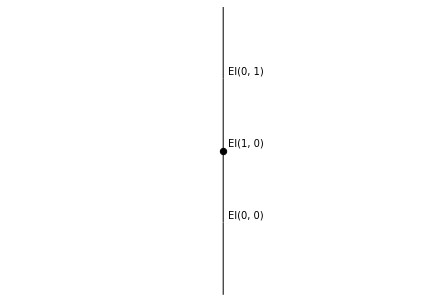

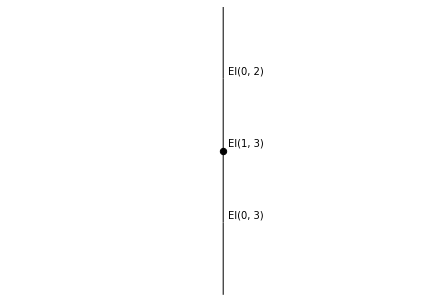

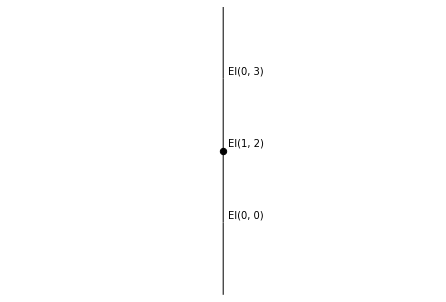

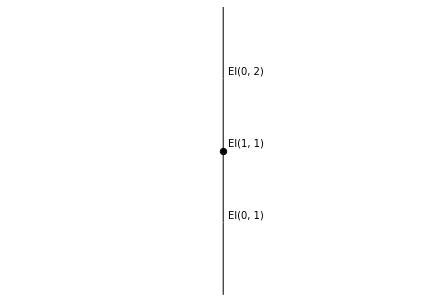

In [40]:
for n in range(2):
    for sign in ('-', '+'):
        square.cube_face(n, sign).draw()

Cubes also have two different kinds of "collapse" maps:

- *degeneracies*, which collapse the cube along a single coordinate (specified by an integer argument), and
- *connections*, which "fold" the cube along a pair of consecutive coordinates (specified by an integer argument), in two different ways (specified by a "sign" argument).

In `rewalt`, we can get a string-diagrammatic picture of these collapse maps.

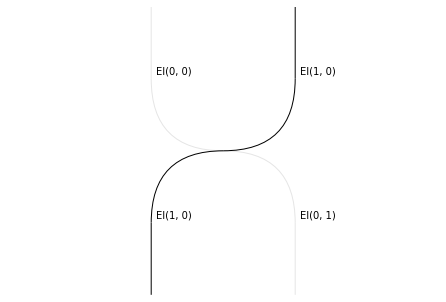

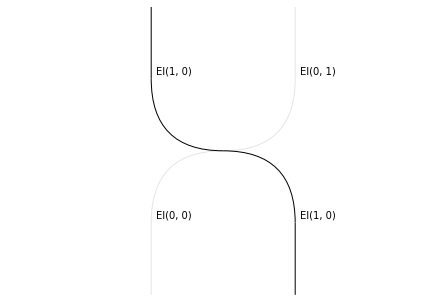

In [41]:
for n in range(2):
    arrow.cube_degeneracy(n).draw()

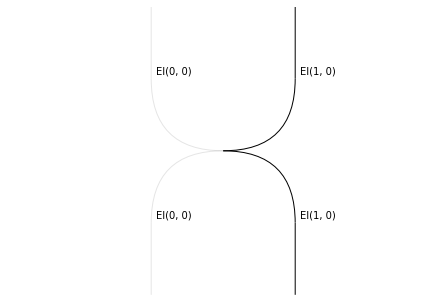

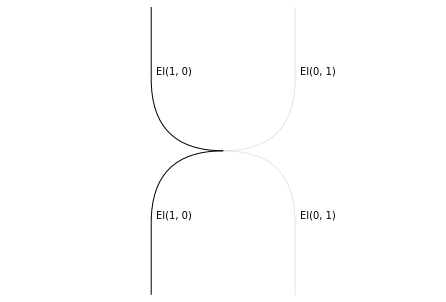

In [42]:
for sign in ('-', '+'):
    arrow.cube_connection(0, sign).draw()

As we saw in [another notebook](stringdiagrams.html#A-presentation-of-adjunctions), being familiar with these degeneracies, which are neither "units" or "unitors", can be handy when constructing presentations of monoidal or higher algebraic theories.

## Constructing a cubical set

Constructing a cubical set with connections is just like constructing a simplicial set, except we use the `add_cube` method instead of the `add_simplex` method when adding generators.

Let's construct a simple cubical model of the torus, with one 0-cell, two 1-cells, and one 2-cell.

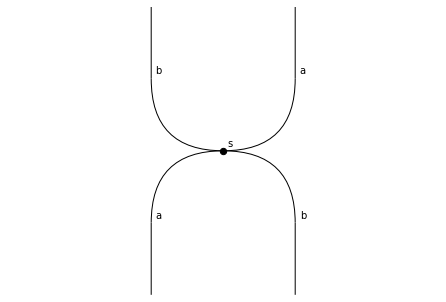

In [43]:
T = rewalt.DiagSet()
pt = T.add_cube('pt')
a = T.add_cube('a', pt, pt)
b = T.add_cube('b', pt, pt)
s = T.add_cube('s', a, a, b, b)
s.draw()

That's all! `T` is a torus.

We can check that the diagrammatic set we constructed is, indeed, a cubical set:

In [44]:
T.iscubical

True

Notice that if we look at this diagrammatic set as *string rewrite system* instead, it is a presentation of the free commutative monoid on the 2 generators `a` and `b`.
Of course, the free *abelian group* on two generators is the first homology group of the torus.

## Mixing them together

One of the reasons why simplices and cubes are "nice" families of shapes is that both are generated by the iteration of a binary operation, which defines a monoidal structure on their respective shape categories:

- simplices are iterated **joins** of points;
- cubes are iterated **products** of intervals.

In fact, both joins and products have "oriented" counterparts, and *all* shapes of `rewalt` are closed under both of these operations:

- the *join* of shapes, accessed either with the `join` method, or with the shift operators `>>` and `<<`, and
- the *Gray product* of shapes, accessed either with the `gray` method, or with the multiplication operator `*`.

Indeed, this is how `rewalt` constructs oriented simplices and oriented cubes.

In [45]:
assert arrow == point >> point
assert triangle == arrow >> point
assert square == arrow * arrow
assert cube == arrow * square

Joins are useful, for instance, for constructing *cones*, while products are useful for constructing *cylinders*. So the first operation is natural in a simplicial context, but not in a cubical context; while the second operation is natural in a cubical context but not in a simplicial context.

One nice thing about diagrammatic sets is that we do not need to choose! We can build a cylinder on a simplex...

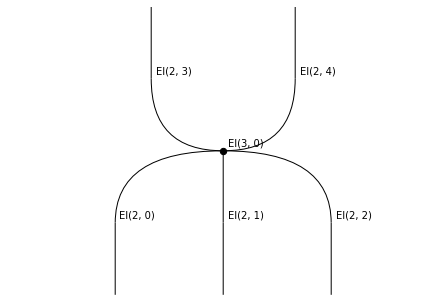

In [46]:
cylinder = arrow * triangle
cylinder.draw()

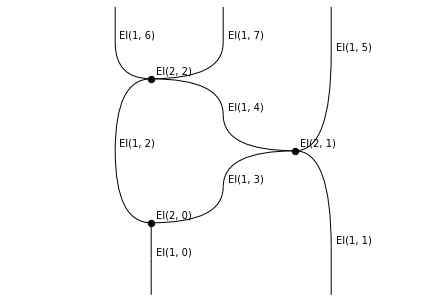

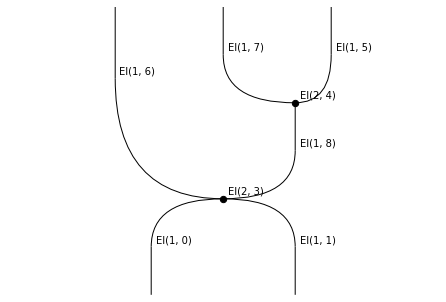

In [47]:
cylinder.draw_boundaries()

... and we can build a cone on a cube.

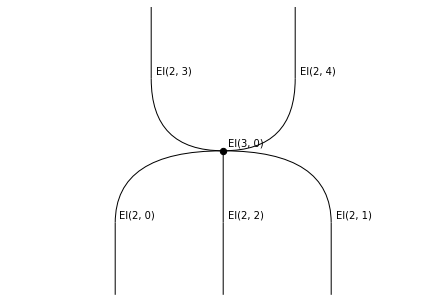

In [48]:
cone = square >> point
cone.draw()

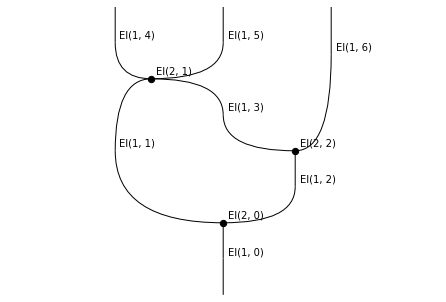

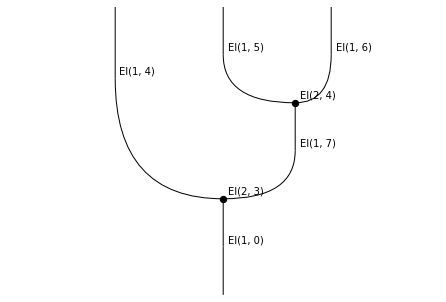

In [49]:
cone.draw_boundaries()